In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset_train = pd.read_csv("dd.csv")
temp = dataset_train[dataset_train.ItemId==972142]
#temp.index = pd.DatetimeIndex(freq='w', start='2014-01-01', periods=197)

In [3]:
temp.reset_index(drop=True, inplace=True)

In [4]:
mydata = temp.iloc[:,7:8]
mydata.head(2)

,QTY
0,4
1,35


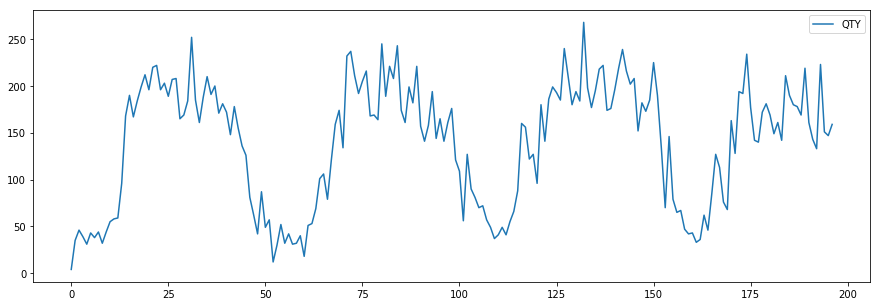

In [5]:
mydata.plot(figsize=(15,5))

In [6]:
from sklearn.preprocessing import MinMaxScaler
values = mydata['QTY'].values.reshape(-1,1)
values= values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [7]:
train_size = int(len(scaled) * 0.8)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

157 40


In [8]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

155
38


In [10]:
trainX

array([[0.        , 0.11742425],
       [0.11742425, 0.15909092],
       [0.15909092, 0.13257577],
       [0.13257577, 0.10227273],
       [0.10227273, 0.14772728],
       [0.14772728, 0.12878789],
       [0.12878789, 0.15151516],
       [0.15151516, 0.10606061],
       [0.10606061, 0.15151516],
       [0.15151516, 0.19318183],
       [0.19318183, 0.20454545],
       [0.20454545, 0.20833334],
       [0.20833334, 0.34848487],
       [0.34848487, 0.6212121 ],
       [0.6212121 , 0.7045455 ],
       [0.7045455 , 0.61742425],
       [0.61742425, 0.68181825],
       [0.68181825, 0.7386364 ],
       [0.7386364 , 0.7878788 ],
       [0.7878788 , 0.72727275],
       [0.72727275, 0.8181819 ],
       [0.8181819 , 0.8257576 ],
       [0.8257576 , 0.72727275],
       [0.72727275, 0.75378793],
       [0.75378793, 0.7007576 ],
       [0.7007576 , 0.76893944],
       [0.76893944, 0.7727273 ],
       [0.7727273 , 0.6098485 ],
       [0.6098485 , 0.62500006],
       [0.62500006, 0.68181825],
       [0.

In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [12]:
trainX.shape

(155, 2, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [14]:
model = Sequential()

model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))
#model.add(Dropout(0.2))

#model.add(LSTM(50))
#model.add(Dropout(0.2))

model.add(Dense(1))

In [15]:
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)

Train on 155 samples, validate on 38 samples
Epoch 1/300
155/155 [==============================] - 1s 6ms/step - loss: 0.5089 - val_loss: 0.4845
Epoch 2/300
155/155 [==============================] - 0s 97us/step - loss: 0.4839 - val_loss: 0.4584
Epoch 3/300
155/155 [==============================] - 0s 116us/step - loss: 0.4569 - val_loss: 0.4308
Epoch 4/300
155/155 [==============================] - 0s 103us/step - loss: 0.4290 - val_loss: 0.4032
Epoch 5/300
155/155 [==============================] - 0s 116us/step - loss: 0.4011 - val_loss: 0.3746
Epoch 6/300
155/155 [==============================] - 0s 110us/step - loss: 0.3723 - val_loss: 0.3453
Epoch 7/300
155/155 [==============================] - 0s 103us/step - loss: 0.3428 - val_loss: 0.3161
Epoch 8/300
155/155 [==============================] - 0s 116us/step - loss: 0.3141 - val_loss: 0.2880
Epoch 9/300
155/155 [==============================] - 0s 103us/step - loss: 0.2863 - val_loss: 0.2609
Epoch 10/300
155/155 [=========

Epoch 80/300
155/155 [==============================] - 0s 90us/step - loss: 0.0983 - val_loss: 0.1129
Epoch 81/300
155/155 [==============================] - 0s 90us/step - loss: 0.0983 - val_loss: 0.1127
Epoch 82/300
155/155 [==============================] - 0s 90us/step - loss: 0.0982 - val_loss: 0.1125
Epoch 83/300
155/155 [==============================] - 0s 90us/step - loss: 0.0982 - val_loss: 0.1125
Epoch 84/300
155/155 [==============================] - 0s 116us/step - loss: 0.0981 - val_loss: 0.1125
Epoch 85/300
155/155 [==============================] - 0s 90us/step - loss: 0.0981 - val_loss: 0.1126
Epoch 86/300
155/155 [==============================] - 0s 97us/step - loss: 0.0981 - val_loss: 0.1126
Epoch 87/300
155/155 [==============================] - 0s 90us/step - loss: 0.0981 - val_loss: 0.1124
Epoch 88/300
155/155 [==============================] - 0s 97us/step - loss: 0.0980 - val_loss: 0.1123
Epoch 89/300
155/155 [==============================] - 0s 97us/step - l

Epoch 159/300
155/155 [==============================] - 0s 103us/step - loss: 0.0963 - val_loss: 0.1098
Epoch 160/300
155/155 [==============================] - 0s 97us/step - loss: 0.0963 - val_loss: 0.1098
Epoch 161/300
155/155 [==============================] - 0s 103us/step - loss: 0.0963 - val_loss: 0.1098
Epoch 162/300
155/155 [==============================] - 0s 97us/step - loss: 0.0963 - val_loss: 0.1098
Epoch 163/300
155/155 [==============================] - 0s 97us/step - loss: 0.0963 - val_loss: 0.1097
Epoch 164/300
155/155 [==============================] - 0s 97us/step - loss: 0.0962 - val_loss: 0.1096
Epoch 165/300
155/155 [==============================] - 0s 97us/step - loss: 0.0962 - val_loss: 0.1095
Epoch 166/300
155/155 [==============================] - 0s 97us/step - loss: 0.0961 - val_loss: 0.1094
Epoch 167/300
155/155 [==============================] - 0s 97us/step - loss: 0.0961 - val_loss: 0.1095
Epoch 168/300
155/155 [==============================] - 0s 84

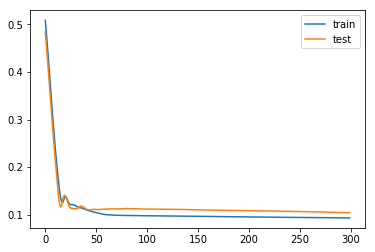

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

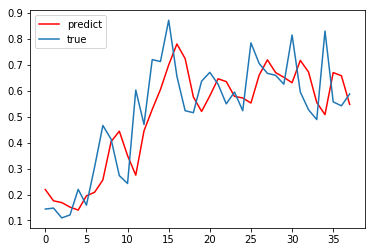

In [17]:
ypred = model.predict(testX)
plt.plot(ypred, label='predict', color='red')
plt.plot(testY, label='true')
plt.legend()

In [18]:
from math import sqrt
from sklearn.metrics import mean_squared_error
ypred_inverse = scaler.inverse_transform(ypred.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))
rmse = sqrt(mean_squared_error(testY_inverse, ypred_inverse))
print('Forecast RMSE: {}'.format(round(rmse, 3)))

Forecast RMSE: 34.668


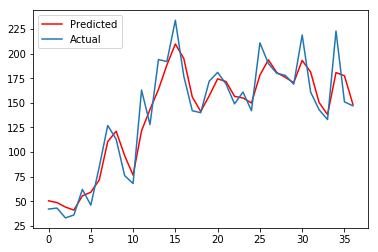

In [26]:
#plt.figure(figsize=(15,5))
plt.plot(ypred_inverse[1:], label='Predicted', color='red')
plt.plot(testY_inverse[:-1], label='Actual')
plt.legend()